# Lab6

### Logistic Regression

## Obtain the data using the sklearn load_iris method. Redefine 2 classes for the target variable: virginica and non-virginica.

In [1]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)

In [4]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target_names[iris.target]=='virginica'
y = pd.DataFrame(y)
y.columns = ['target']
display(X.head(), y.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,target
0,False
1,False
2,False
3,False
4,False


## Explore the data

### 1 table with descriptive statistics for each of the two classes.

In [5]:
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df["target"] = y
df.groupby("target").describe()

sepal length (cm)                                               
                   count   mean       std  min    25%  50%  75%  max   
target                                                                 
False              100.0  5.471  0.641698  4.3  5.000  5.4  5.9  7.0  \
True                50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

       sepal width (cm)         ... petal length (cm)      petal width (cm)   
                  count   mean  ...               75%  max            count   
target                          ...                                           
False             100.0  3.099  ...             4.325  5.1            100.0  \
True               50.0  2.974  ...             5.875  6.9             50.0   

                                                  
         mean       std  min  25%  50%  75%  max  
target                                            
False   0.786  0.565153  0.1  0.2  0.8  1.3  1.8  
True    2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[2 rows x 32 columns]

### 1 Histogram per feature, for each of the two classes. consider using the 'hue' argument to distinguish between classes in the same graph.

<Axes: xlabel='sepal width (cm)', ylabel='Count'>

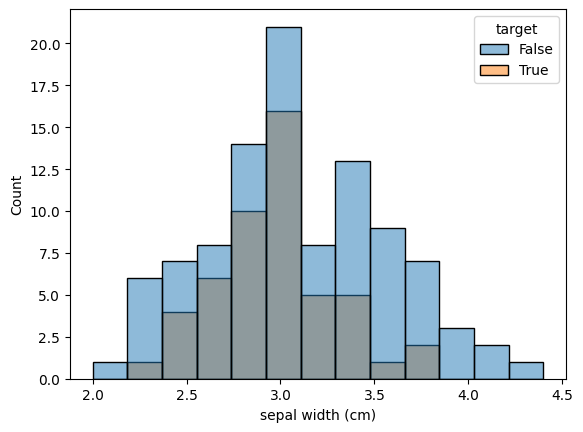

In [6]:
import seaborn as sns
sns.histplot(data = df, x = "sepal width (cm)", hue="target")

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

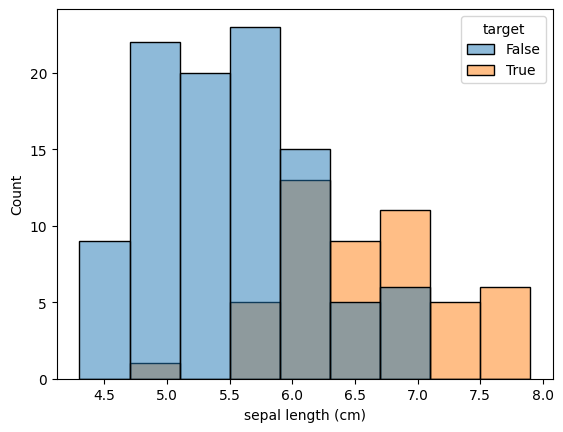

In [7]:
sns.histplot(data = df, x = "sepal length (cm)", hue="target")

<Axes: xlabel='petal width (cm)', ylabel='Count'>

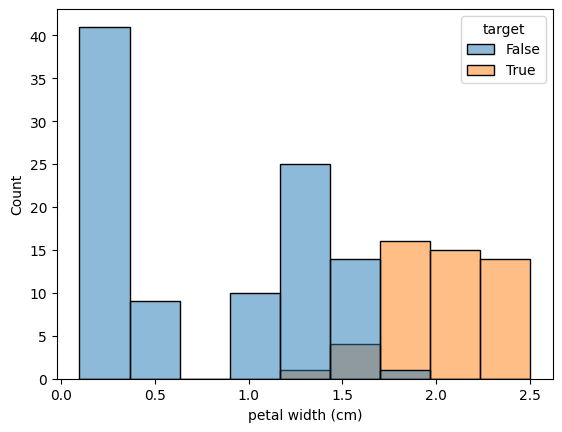

In [8]:
sns.histplot(data = df, x = "petal width (cm)", hue="target")

<Axes: xlabel='petal length (cm)', ylabel='Count'>

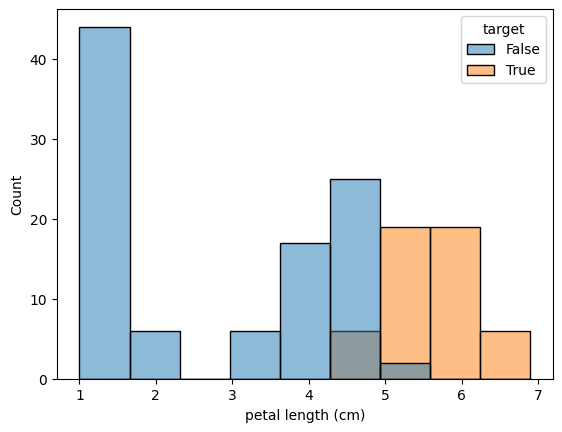

In [9]:
sns.histplot(data = df, x = "petal length (cm)", hue="target")

### Correlation matrix between the four features

<Axes: >

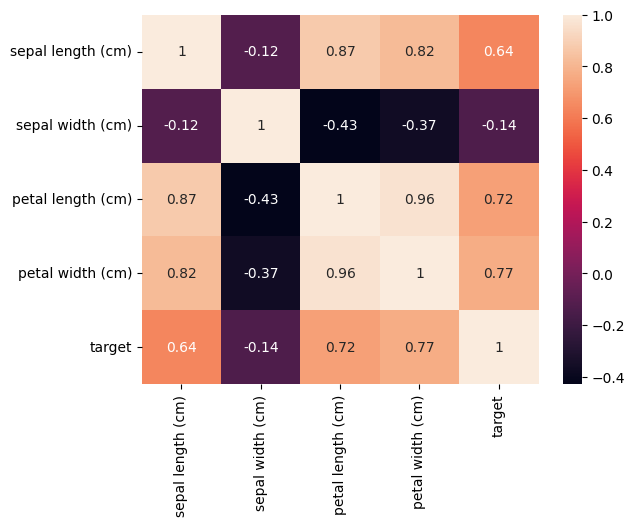

In [10]:
corr = df.corr()
sns.heatmap(corr, annot=True)

### At least 3 additional graphs. Use Kaggle for inspiration: Add a reference(as a link) to the source of each graph. Explain what is the meaning of this graph, what can we learn from it.

#### 1) boxplots (reference: https://www.kaggle.com/code/abdmental01/iris-flower-eda-ml-beginner)

In [12]:
import plotly.express as px
fig_boxplot = px.box(df, x="target", y="sepal width (cm)", title="Box Plot of Sepal width (cm) by target",
                     color='target'  # Set box color based on Species
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="target", yaxis_title="Sepal width (cm)",)

# Show the box plot
fig_boxplot.show()

In [13]:
fig_boxplot = px.box(df, x="target", y="sepal length (cm)", title="Box Plot of Sepal length (cm) by target",
                     color='target'  # Set box color based on Species
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="target", yaxis_title="Sepal length (cm)",)

# Show the box plot
fig_boxplot.show()

In [14]:
fig_boxplot = px.box(df, x="target", y="petal width (cm)", title="Box Plot of petal width (cm) by target",
                     color='target'  # Set box color based on Species
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="target", yaxis_title="petal width (cm)",)

# Show the box plot
fig_boxplot.show()

In [15]:
fig_boxplot = px.box(df, x="target", y="petal length (cm)", title="Box Plot of petal length (cm) by target",
                     color='target'  # Set box color based on Species
                    )

# Update layout
fig_boxplot.update_layout(xaxis_title="target", yaxis_title="petal length (cm)",)

# Show the box plot
fig_boxplot.show()

<b>The meaning of this graph:</b><br>
* Four boxplots represent different feature of a dataset (sepal width, sepal length, petal width, petal length) and the distribution across two categories of a target variable (true or false). <br>
* Each box plot shows the median and IQR, which show the variability of the data. Additionally, the dots outside the whiskers indicate outliers in sepal width and sepal length. <br>

<b>What we can learn from it:</b><br>
* sepal width: both categories have similar ranges in the dataset. However, False category has bigger standard deviation than True category.
* sepal length: true category has generally higher sepal length than false category. It might be a good feature to distinguish between the two categories.
* petal width: it shows similar pattern with sepal length, true category has higher values than false category. It indicates that petal width might be a strong feature for distinguish between the two categories.
* petal length: it shows similar pattern with sepal length and petal width. This feature also seems to be a good discriminator between the two categories.


#### 2) Scatter plot (reference: https://www.kaggle.com/code/mdismielhossenabir/analysis-data-visualization-techniques)

In [16]:
fig = px.scatter_matrix(df, dimensions=["sepal width (cm)", "sepal length (cm)", "petal width (cm)", "petal length (cm)"], color="target")
fig.update_layout(width=1200, height=800)
fig.show()

<b>The meaning of this graph:</b><br>
* This scatterplot matrix is to understand the relationship between different features in a dataset. Each small plot shows the relationship between two features in a datset. The color of the points distinguishes between two categories of a target variable (true or false).<br>

<b>What can we learn from it:</b><br>
* The line plots in the matrix show a positive correlation when points are aligned in a diagonal pattern from the bottom-left to the top-right.
* The other plots show how each pair of features are distributed with respect to each other. These patterns in these plots can indicate relationships that might be important for classification.
* Two colors distinguishes two categories of the target variable (true and false) show how well separated the classes are with respect to the features.

#### 3) pair plot (reference: https://www.kaggle.com/code/mdismielhossenabir/analysis-data-visualization-techniques)

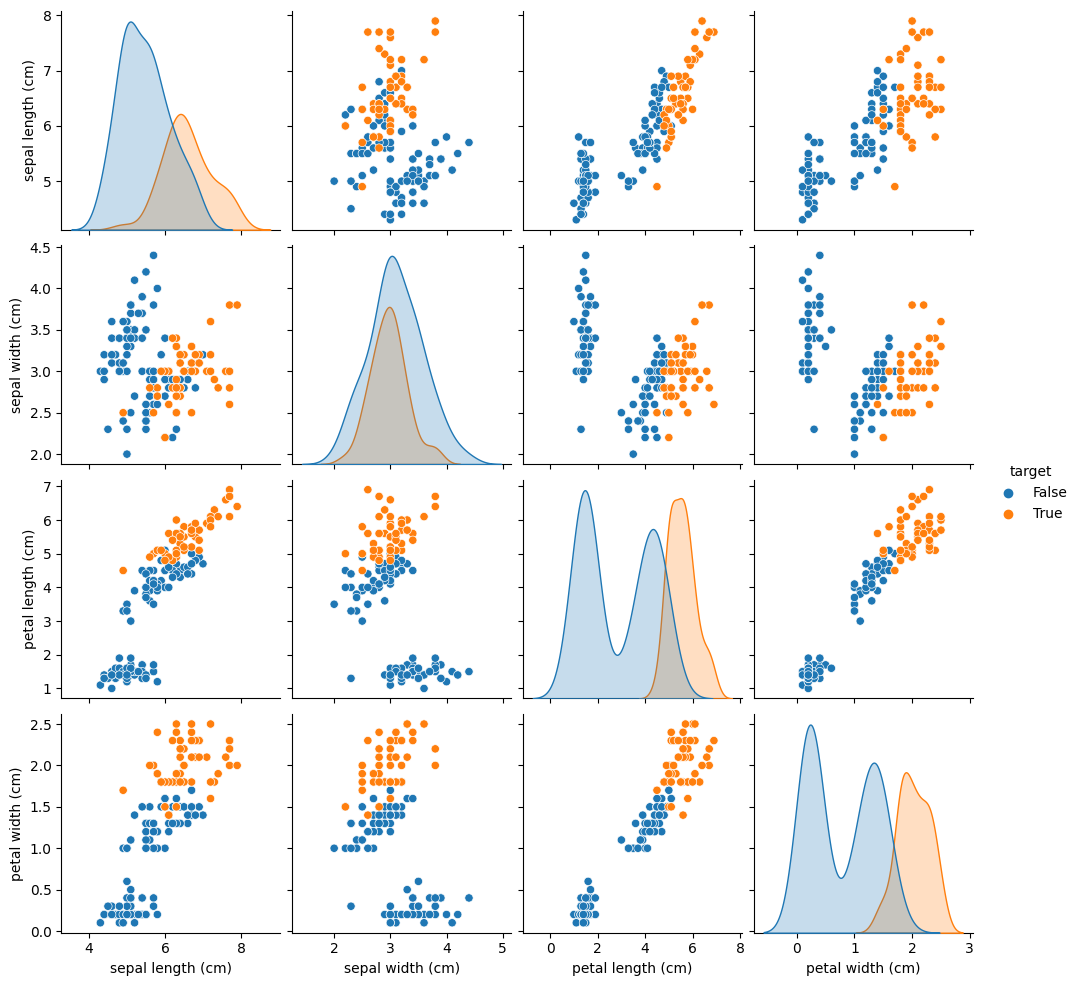

In [17]:
sns.pairplot(data=df, hue="target")

<b>The meaning of this graph:</b><br>
* This is pair plot using seaborn, which is a grid of scatter plots for each pair of features and histograms for the distribution of each feature, separated by the target category (true or false). This graph is to understand the relationships between different variables in a dataset, as well as their individual distributions.

<b>What can we learn from it:</b><br>
* The diagonal plots are histograms, showing the distribution of each feature for both categories (true and false). This shows a spread of the values for each feature, as well as how much they overlap between the two categories.<br>
* The other plots are scatter plots showing the relationship between pairs of features, colored by the target category. They indicate if there are any clear patterns that separate true from false based on the combination of two features.<br>
* If the scatter plot shows a distinct pattern separating true and false categories, this indicates a potential correlation between the features and the target variable.

### At least 3 insights.

* High Correlation: according to the correlation matrix, 'petal length' and 'petal width' have high positive correlations with the target (0.72 and 0.77 respectively). This suggests that the two features are strong predictors of the target variable. Moreover, from the histograms, 'petal length' and 'petal width' two features show a clear distinction between the true and false categories.
* Feature Relationships: 'petal length' and 'petal width' both are good features to predict target variable, however, from the correlation matrix, they show a high correlation between them with 0.96 value, which indicates these features provide similar information.
* Less Correlation: 'sepal width has a very low negative correlation with the target (-0.14). Also, the histogram shows a considerable overlab between the true and false categories. This suggests that this feature may not be a good predictor for the target variable.

## Split the data to a train set(120 records), a validation set(15 records) and a test set (15 records).

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

## Run four logistic regression models, with 1,2,3 and 4 features. Choose the order in random, or based on some reasoning.

In [19]:
from sklearn.linear_model import LogisticRegression

I chose features based on correlation matrix. (high correlation order) <br>
petal width -> petal length -> sepal length -> sepal width

* feature 1 (petal width)

In [20]:
log_reg1 = LogisticRegression()
log_reg1.fit(X_train[['petal width (cm)']], y_train['target'])

LogisticRegression()

* feature 2 (petal width, petal length)

In [21]:
log_reg2 = LogisticRegression()
log_reg2.fit(X_train[['petal width (cm)', 'petal length (cm)']], y_train['target'])

LogisticRegression()

* feature 3 (petal width, petal length, sepal length)

In [22]:
log_reg3 = LogisticRegression()
log_reg3.fit(X_train[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']], y_train['target'])

LogisticRegression()

* feature 4 (petal width, petal length, sepal length, sepal width)

In [23]:
log_reg4 = LogisticRegression()
log_reg4.fit(X_train[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']], y_train['target'])

LogisticRegression()

## Evaluate the models on the validation set:

### i. Use the predict and predict_proba methods to list in a table how well each model is doing for each of the instances in the validationset.

#### 1) 1 feature

In [24]:
pred1 = log_reg1.predict(X_val[['petal width (cm)']])
prob1 = log_reg1.predict_proba(X_val[['petal width (cm)']])

In [32]:
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze()

results_df1 = pd.DataFrame({
    'probability of predicting verginica': prob1[:, 1],
    'actual prediction by the model': pred1,
    'ground truth': y_val
})
results_df1

,probability of predicting verginica,actual prediction by the model,ground truth
24,0.003388,False,False
116,0.618328,True,True
66,0.337653,False,False
95,0.138239,False,False
96,0.190836,False,False
67,0.069086,False,False
81,0.069086,False,False
118,0.917549,True,True
63,0.257467,False,False
126,0.618328,True,True


#### 2) 2 features

In [26]:
pred2 = log_reg2.predict(X_val[['petal width (cm)', 'petal length (cm)']])
prob2 = log_reg2.predict_proba(X_val[['petal width (cm)', 'petal length (cm)']])

In [33]:
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze()

results_df2 = pd.DataFrame({
    'probability of predicting verginica': prob2[:, 1],
    'actual prediction by the model': pred2,
    'ground truth': y_val
})
results_df2

,probability of predicting verginica,actual prediction by the model,ground truth
24,0.000012,False,False
116,0.852417,True,True
66,0.168715,False,False
95,0.046909,False,False
96,0.056508,False,False
67,0.024601,False,False
81,0.008294,False,False
118,0.998639,True,True
63,0.224586,False,False
126,0.455614,False,True


#### 3) 3 features

In [28]:
pred3 = log_reg3.predict(X_val[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']])
prob3 = log_reg3.predict_proba(X_val[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']])

In [34]:
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze()

results_df3 = pd.DataFrame({
    'probability of predicting verginica': prob3[:, 1],
    'actual prediction by the model': pred3,
    'ground truth': y_val
})
results_df3

,probability of predicting verginica,actual prediction by the model,ground truth
24,0.000013,False,False
116,0.851222,True,True
66,0.180533,False,False
95,0.049538,False,False
96,0.059655,False,False
67,0.025567,False,False
81,0.008873,False,False
118,0.998453,True,True
63,0.227851,False,False
126,0.457867,False,True


#### 4) 4 features

In [30]:
pred4 = log_reg4.predict(X_val[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']])
prob4 = log_reg4.predict_proba(X_val[['petal width (cm)', 'petal length (cm)', 'sepal length (cm)', 'sepal width (cm)']])

In [35]:
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze()

results_df4 = pd.DataFrame({
    'probability of predicting verginica': prob4[:, 1],
    'actual prediction by the model': pred4,
    'ground truth': y_val
})
results_df4

,probability of predicting verginica,actual prediction by the model,ground truth
24,0.000011,False,False
116,0.848587,True,True
66,0.172442,False,False
95,0.046720,False,False
96,0.057878,False,False
67,0.025899,False,False
81,0.009635,False,False
118,0.998645,True,True
63,0.224716,False,False
126,0.463947,False,True


#### Summarize the data in each table to a single measure(number) per model. What would you use?

* I will use accuracy. <br>
(Number of correct predictions/total number of predictions)

In [38]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_val, pred1)
print("Accuracy of the logistic regression model1 is: ", accuracy1*100, "%")
accuracy2 = accuracy_score(y_val, pred2)
print("Accuracy of the logistic regression model2 is: ", accuracy2*100, "%")
accuracy3 = accuracy_score(y_val, pred3)
print("Accuracy of the logistic regression model3 is: ", accuracy3*100, "%")
accuracy4 = accuracy_score(y_val, pred4)
print("Accuracy of the logistic regression model4 is: ", accuracy4*100, "%")

Accuracy of the logistic regression model1 is:  100.0 %
Accuracy of the logistic regression model2 is:  86.66666666666667 %
Accuracy of the logistic regression model3 is:  86.66666666666667 %
Accuracy of the logistic regression model4 is:  86.66666666666667 %


### ii Plot the decision boundary for three models (with 1,2 and 3 features;3 plots), together with the validation data.

#### 1) model 1 with 1 feature

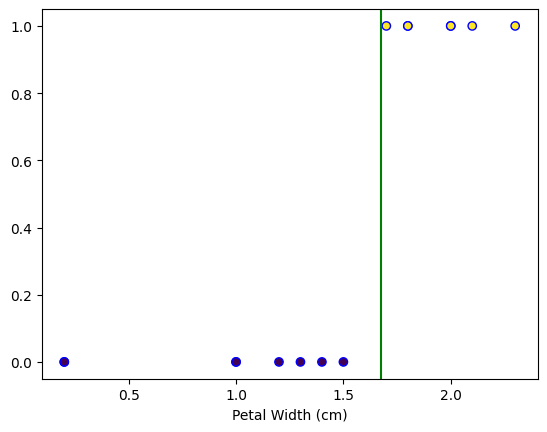

In [39]:
import matplotlib.pyplot as plt
import numpy as np

X_val_feature = X_val['petal width (cm)']

decision_boundary = -log_reg1.intercept_ / log_reg1.coef_[0]
plt.scatter(X_val_feature, y_val, c=y_val, edgecolor='b')
plt.axvline(x=decision_boundary, color='green')

plt.xlabel('Petal Width (cm)')
plt.show()

#### 2) model 2 with 2 features

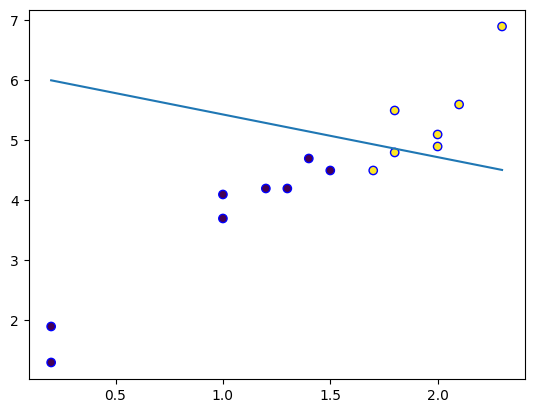

In [40]:
decision_boundary_x1 = np.linspace(X_val['petal width (cm)'].min(), X_val['petal width (cm)'].max(), 10)
decision_boundary_x2 = -log_reg2.intercept_ / log_reg2.coef_[0][1] - log_reg2.coef_[0][0] / log_reg2.coef_[0][1] * decision_boundary_x1
plt.scatter(X_val['petal width (cm)'], X_val['petal length (cm)'], c=y_val, edgecolor='b')
plt.plot(decision_boundary_x1, decision_boundary_x2)

#### 3) model 3 with 3 features

In [41]:
y_val_numeric = y_val.astype(int)

In [42]:
import plotly.graph_objs as go
import numpy as np

min_feature_value1 = X_val['petal width (cm)'].min(axis=0) - 1
max_feature_value1 = X_val['petal width (cm)'].max(axis=0) + 1
min_feature_value2 = X_val['petal length (cm)'].min(axis=0) - 1
max_feature_value2 = X_val['petal length (cm)'].max(axis=0) + 1

x1, x2 = np.meshgrid(np.linspace(min_feature_value1, max_feature_value1, 100),
                     np.linspace(min_feature_value2, max_feature_value2, 100))

x3 = (-log_reg3.intercept_ - log_reg3.coef_[0][0] * x1 - log_reg3.coef_[0][1] * x2) / log_reg3.coef_[0][2]
decision_boundary_surface = go.Surface(x=x1, y=x2, z=x3, colorscale='Viridis', opacity=0.5)

data_scatter = go.Scatter3d(x=X_val['petal width (cm)'], y=X_val['petal length (cm)'], z=X_val['sepal length (cm)'],
                            mode='markers', 
                            marker=dict(size=5, color=y_val_numeric, colorscale='Bluered', opacity=0.8))

layout = go.Layout(title='3D plot with decision boundary',
                   scene=dict(xaxis_title='petal width (cm)',
                              yaxis_title='petal length (cm)',
                              zaxis_title='sepal length (cm)'),
                   margin=dict(l=0, r=0, b=0, t=0))

fig = go.Figure(data=[decision_boundary_surface, data_scatter], layout=layout)
fig.show()


### iii. Failure modes: using the two preceding steps, in which types of data instances is each model wrong? Can you identify some failure patterns within a model or across models?

According to tables which have predict and predict prob methods, 106 and 126 instances failed in both 2 features model and 3 features model.<br>
There are some failure patterns. According to the graphs above, these instances plotted close to the boundary decisions across all the models.

In [46]:
X_val.iloc[9], X_val.iloc[13]

(sepal length (cm)    6.2
 sepal width (cm)     2.8
 petal length (cm)    4.8
 petal width (cm)     1.8
 Name: 126, dtype: float64,
 sepal length (cm)    4.9
 sepal width (cm)     2.5
 petal length (cm)    4.5
 petal width (cm)     1.7
 Name: 106, dtype: float64)

## Recommend the best model (provide reasoning). Summarize the results of this model on the test set.

I will recommend the first logistic regression model(1 feature: petal width) as the best model.<br>
- Reason: according to the accuracy above, the first logistic regression model with petal width feature has the highest accuracy. Moreover, it is the simplest model that still offers high performance. Also, it shows high performance on the test set as below (accuracy: 100%).

In [48]:
pred_test = log_reg1.predict(X_test[['petal width (cm)']])
prob_test = log_reg1.predict_proba(X_test[['petal width (cm)']])

In [49]:
if isinstance(y_test, pd.DataFrame):
    y_test = y_test.squeeze()

results_df_test = pd.DataFrame({
    'probability of predicting verginica': prob_test[:, 1],
    'actual prediction by the model': pred_test,
    'ground truth': y_test
})
results_df_test

,probability of predicting verginica,actual prediction by the model,ground truth
91,0.257467,False,False
59,0.257467,False,False
49,0.003388,False,False
125,0.618328,True,True
69,0.098376,False,False
45,0.004973,False,False
100,0.960087,True,True
61,0.337653,False,False
113,0.777866,True,True
13,0.002307,False,False


In [50]:
accuracy_test = accuracy_score(y_test, pred_test)
print("Accuracy of the logistic regression model1 on test is: ", accuracy_test*100, "%")

Accuracy of the logistic regression model1 on test is:  100.0 %
